In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
bed_test = pd.read_csv("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Papio_cynocephalus_ssp/filteredVCF/pos_bed_cov_based/Papio_cynocephalus_ssp_batch19_fploidy2_mploidy2.bed",
           sep="\t", names=["chrom", "start", "end"])
(bed_test["end"].sum()-bed_test["start"].sum())/bed_test["end"].max()

0.8910404505119721

In [3]:
# Standardized parts.
short_form = "Papio"
long_form = "Papio_papio_ssp"
size_cutoff = 1000000
window_size = 100000 # Should maybe decrease to 25 or 10kb.

metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]

In [4]:
metadata_df

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y,SEX_I
0,SAMEA112482952,PD_0199,SAMEA112482952,ERS14600303,PRJEB59576,Papio_anubis_ssp,Papio_anubis_ssp,Papio_anubis_ssp,Papio,anubis,ssp,F,F,39.075,0.988,39.115,0.968,43.643,0.159,0
1,SAMEA112482953,PD_0200,SAMEA112482953,ERS14600304,PRJEB59576,Papio_anubis_ssp,Papio_anubis_ssp,Papio_anubis_ssp,Papio,anubis,ssp,F,F,37.785,0.988,36.849,0.968,43.974,0.159,0
2,SAMEA112482954,PD_0201,SAMEA112482954,ERS14600305,PRJEB59576,Papio_anubis_ssp,Papio_anubis_ssp,Papio_anubis_ssp,Papio,anubis,ssp,M,M,31.344,0.988,16.172,0.967,20.888,0.955,1
3,SAMEA112482955,PD_0202,SAMEA112482955,ERS14600306,PRJEB59576,Papio_anubis_ssp,Papio_anubis_ssp,Papio_anubis_ssp,Papio,anubis,ssp,M,M,36.430,0.988,18.598,0.967,23.463,0.956,1
4,SAMEA112482956,PD_0203,SAMEA112482956,ERS14600307,PRJEB59576,Papio_anubis_ssp,Papio_anubis_ssp,Papio_anubis_ssp,Papio,anubis,ssp,F,F,30.919,0.988,30.824,0.968,40.523,0.156,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,SAMEA112483160,PD_0693,SAMEA112483160,ERS14600511,PRJEB59576,Papio_ursinus_ssp,Papio_ursinus_ssp,Papio_anubis_ssp,Papio,ursinus,ssp,F,F,36.163,0.988,34.662,0.966,33.440,0.160,0
737,SAMEA112483161,PD_0694,SAMEA112483161,ERS14600512,PRJEB59576,Papio_ursinus_ssp,Papio_ursinus_ssp,Papio_anubis_ssp,Papio,ursinus,ssp,F,F,36.515,0.988,35.602,0.967,35.303,0.159,0
738,SAMEA112483162,PD_0695,SAMEA112483162,ERS14600513,PRJEB59576,Papio_ursinus_ssp,Papio_ursinus_ssp,Papio_anubis_ssp,Papio,ursinus,ssp,F,F,37.993,0.988,38.139,0.967,40.553,0.161,0
739,SAMN02866412,SAMN02866412,SAMN02866412,SRS659271,PRJNA54009,Papio_ursinus_ssp,Papio_ursinus_ssp,Papio_anubis_ssp,Papio,ursinus,ssp,F,F,25.162,0.989,25.860,0.970,25.590,0.188,0


In [5]:
sorted_f = metadata_df.loc[(metadata_df.GENETIC_SEX == "F")
                      & (metadata_df.AVG_COVERAGE_X < 40)].sort_values(by="PROP_COVERED_A", ascending=False)
sorted_f.loc[sorted_f.GVCF_ID == "SAMN03072807"] # Want to check a Ruaha baboon, which is PD_0213-217 and 503

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y,SEX_I
718,SAMN03072807,SAMN03072807,SAMN03072807,SRS743354,PRJNA162517,Papio_kindae_ssp,Papio_kindae_ssp,Papio_anubis_ssp,Papio,kindae,ssp,F,F,37.209,0.989,35.785,0.97,35.821,0.207,0


Visualize the various PSMC curves for the test baboon cases.

In [6]:
id_l = []
for p in glob.glob("../steps/cobraa/*b7_final_parameters.txt"):
    id_l.append(p.split("/")[-1].split("_")[0])

In [7]:
glob.glob("../steps/cobraa/SAMEA112483032*_final_parameters.txt")

['../steps/cobraa/SAMEA112483032_b14_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b6_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b0_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b19_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b12_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_aut_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b7_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b15_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b13_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b18_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b1_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b4_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_chrX_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b16_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b10_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b9_final_parameters.txt',
 '../steps/cobraa/SAMEA112483032_b2_final_par

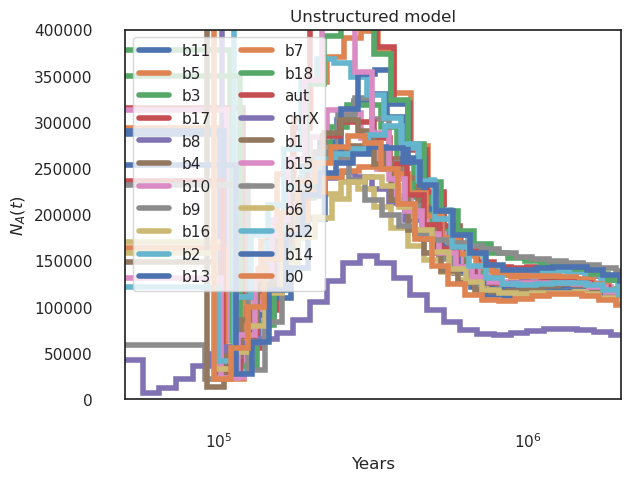

In [8]:
mu = 0.57e-08
gen = 11
for p in glob.glob("../steps/cobraa/SAMEA112482967_*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(5e+04,2e+06)
    plt.ylim(0,40e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
plt.show()

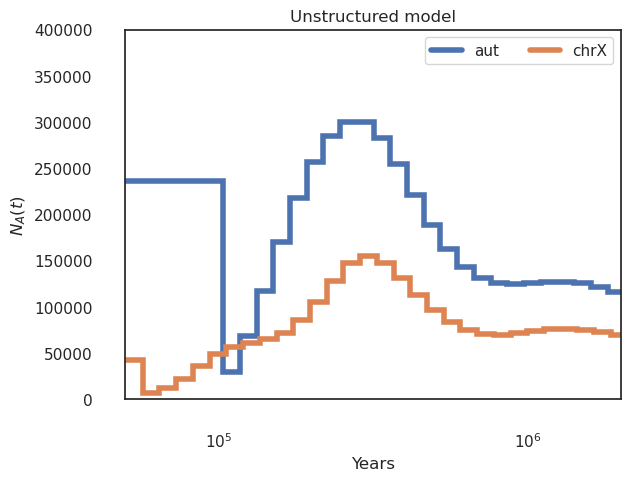

In [9]:
mu = 0.57e-08
gen = 11
for p in ["../steps/cobraa/SAMEA112482967_aut_final_parameters.txt",
         "../steps/cobraa/SAMEA112482967_chrX_final_parameters.txt"]:
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(5e+04,2e+06)
    plt.ylim(0,40e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
plt.show()

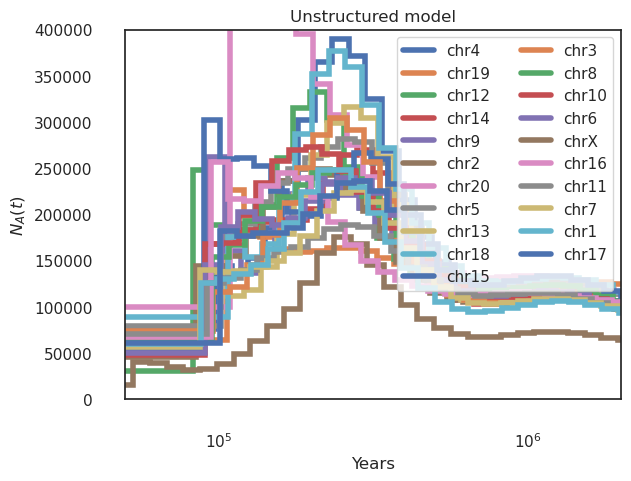

In [10]:
mu = 0.57e-08
gen = 11
for p in glob.glob("../steps/cobraa/PD_0214_chr*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[2]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(5e+04,2e+06)
    plt.ylim(0,40e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
plt.show()

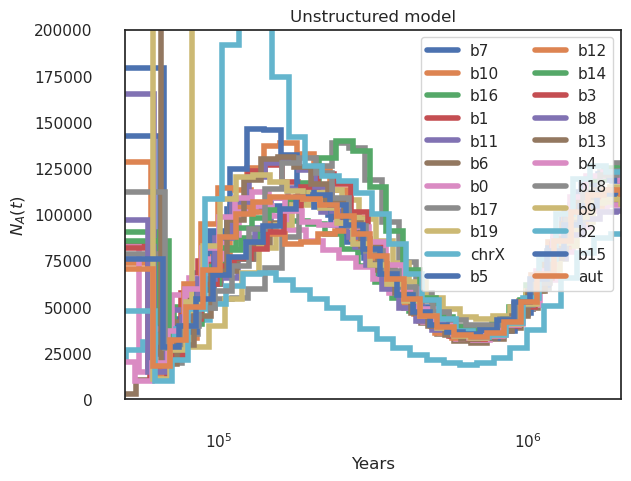

In [50]:
mu = 0.57e-08
gen = 11
for p in glob.glob("../steps/cobraa/SAMN02866411*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(5e+04,2e+06)
    plt.ylim(0,20e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
plt.show()

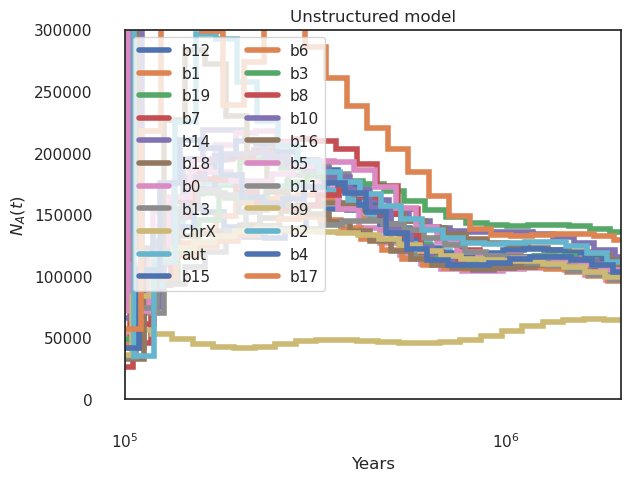

In [12]:
#Papio_anubis, Papio_ursinus, Papio_kindae, Papio_cynocephalus, Papio_hamadryas, Papio_papio
# SAMN02866411, SAMN02866412, SAMN03072807, SAMN02866414, SAMN24909952, SAMEA112483032
mu = 0.57e-08
gen = 11
for p in glob.glob("../steps/cobraa/SAMN03072807*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(10e+04,2e+06)
    plt.ylim(0,30e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
plt.show()

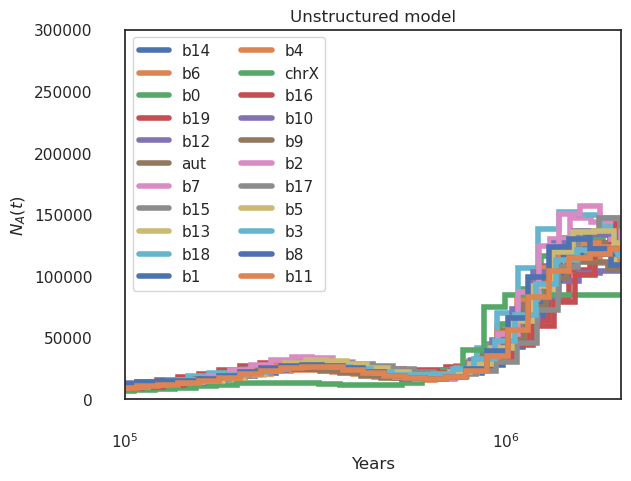

In [51]:
mu = 0.57e-08
gen = 11
cor_df = pd.DataFrame()
for p in glob.glob("../steps/cobraa/SAMEA112483032_*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(10e+04,2e+06)
    plt.ylim(0,30e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
    cor_df[label_tag] = (1/final_params[:,2])/mu
plt.show()

<Axes: >

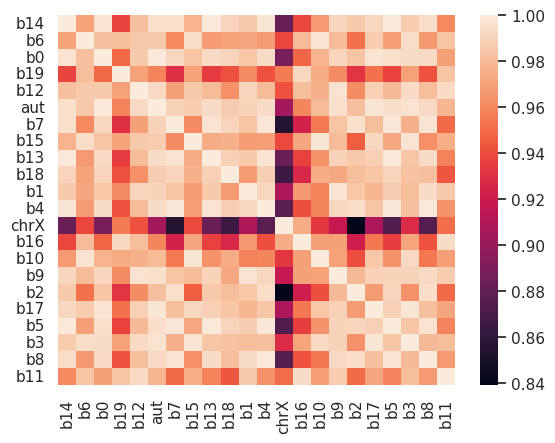

In [44]:
sns.heatmap(cor_df.corr())

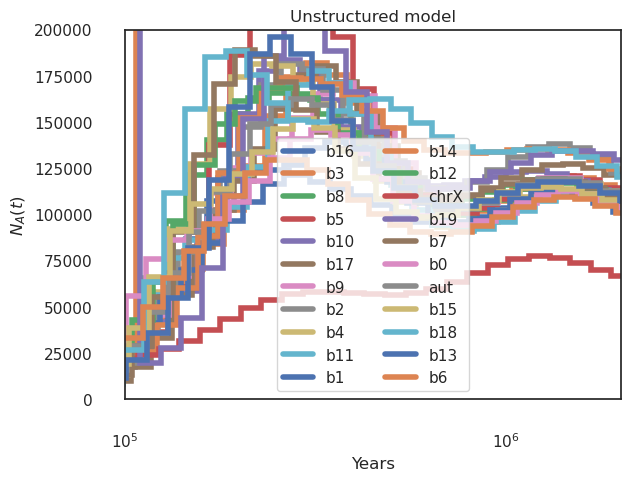

In [45]:
mu = 0.57e-08
gen = 11
cor_df = pd.DataFrame()
for p in glob.glob("../steps/cobraa/SAMN02866414*_final_parameters.txt"):
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(10e+04,2e+06)
    plt.ylim(0,20e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
    cor_df[label_tag] = (1/final_params[:,2])/mu
plt.show()

<Axes: >

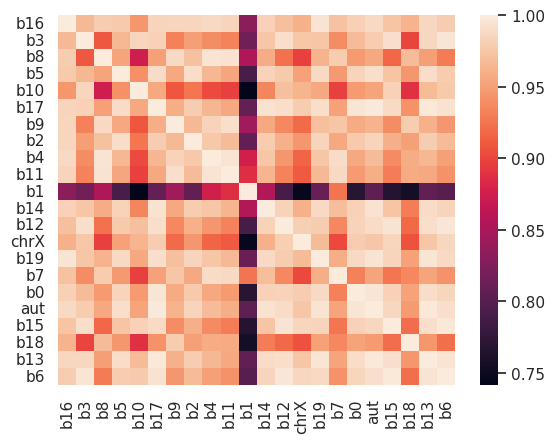

In [46]:
sns.heatmap(cor_df.corr())

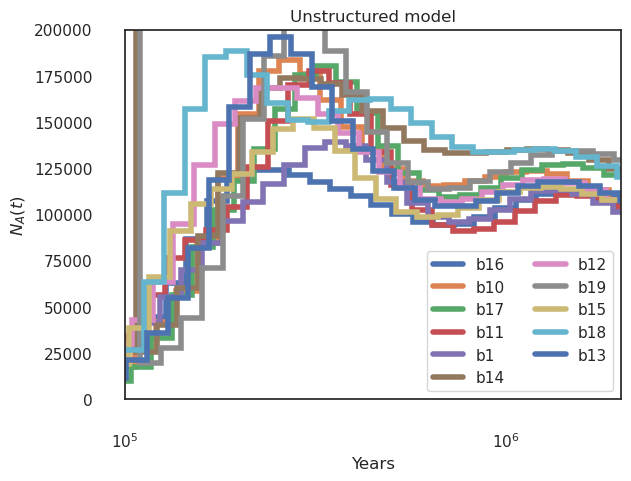

In [49]:
mu = 0.57e-08
gen = 11
cor_df = pd.DataFrame()
for p in glob.glob("../steps/cobraa/SAMN02866414_b1*_final_parameters.txt")[:]:
    label_tag = p.split("/")[-1].split("_")[1]
    final_params_file = p
    final_params = np.loadtxt(final_params_file)
    time_array = list(final_params[:,1])
    time_array.insert(0,0)
    time_array = np.array(time_array)
    plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
    plt.xlim(10e+04,2e+06)
    plt.ylim(0,20e+04)
    plt.xscale('log')
    plt.ylabel('$N_A(t)$')
    plt.xlabel('Years')
    plt.tick_params(which='major',length=20)
    plt.tick_params(which='minor',length=10)
    plt.legend(ncol=2)
    plt.title('Unstructured model')
    cor_df[label_tag] = (1/final_params[:,2])/mu
plt.show()

In [25]:
time_array

array([0.00000000e+00, 9.52019578e-06, 1.07805926e-05, 1.22078557e-05,
       1.38240770e-05, 1.56542728e-05, 1.77267717e-05, 2.00736527e-05,
       2.27312418e-05, 2.57406741e-05, 2.91485308e-05, 3.30075602e-05,
       3.73774939e-05, 4.23259714e-05, 4.79295872e-05, 5.42750763e-05,
       6.14606568e-05, 6.95975500e-05, 7.88117020e-05, 8.92457330e-05,
       1.01061145e-04, 1.14440822e-04, 1.29591860e-04, 1.46748773e-04,
       1.66177122e-04, 1.88177627e-04, 2.13090821e-04, 2.41302320e-04,
       2.73248793e-04, 3.09424720e-04, 3.50390046e-04, 3.96778851e-04,
       4.49309157e-04, 5.08794050e-04, 5.76154262e-04, 6.52432419e-04,
       7.38809188e-04, 8.36621540e-04, 9.47383456e-04, 1.07280935e-03,
       1.21484062e-03, 1.37567568e-03, 1.55780400e-03, 1.76404463e-03,
       1.99758986e-03, 2.26205457e-03, 2.56153228e-03, 2.90065841e-03,
       3.28468208e-03, 3.71954739e-03, 4.21198534e-03])